In [69]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Figure 2.1 

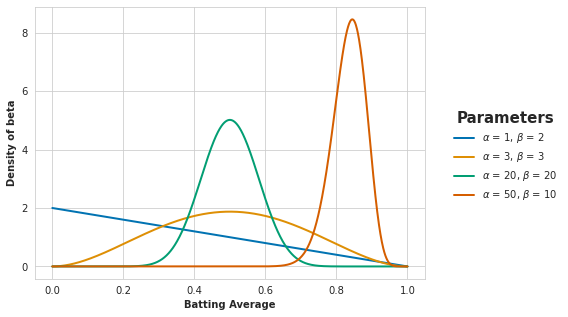

In [67]:
# Figure 2.1
with sns.axes_style("whitegrid"):
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot()

    # Define alpha and beta params
    alphas = [1,3,20,50]
    betas  = [2,3,20,10]

    # Plot
    clrs = sns.color_palette("colorblind",n_colors=len(alpha))
    x = np.linspace(0,1,1000)
    for (a,b,clr) in zip(alphas,betas,clrs):
        y = ax.plot(x, stats.beta.pdf(x, a, b),color=clr, lw=2,label= r"$\alpha$ = {}, $\beta$ = {}".format(a,b))
    ax.legend(frameon=False,bbox_to_anchor=(1.05, .65),loc='upper left')
    ax.get_legend().set_title("Parameters",prop = {'size':15,'weight': "bold"})
    ax.set_xlabel("Batting Average",fontweight="bold")
    ax.set_ylabel("Density of beta",fontweight="bold")



# Figure 2.2

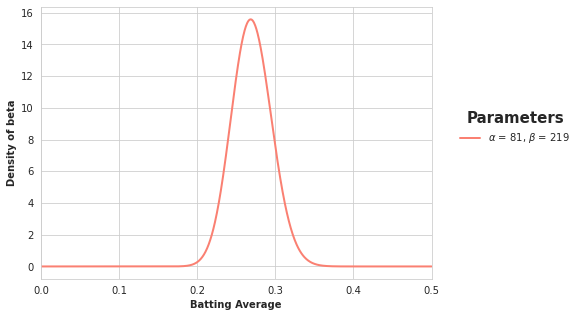

In [68]:
# Figure 2.2

a,b = 81, 219
x = np.linspace(0,0.5,1000)
with sns.axes_style("whitegrid"):
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot()
    y = ax.plot(x, stats.beta.pdf(x,a,b),color="salmon", lw=2,label= r"$\alpha$ = {}, $\beta$ = {}".format(a,b))
    ax.legend(frameon=False,bbox_to_anchor=(1.05, .65),loc='upper left')
    ax.get_legend().set_title("Parameters",prop = {'size':15,'weight': "bold"})
    ax.set_xlim(0,0.5)
    ax.set_xlabel("Batting Average",fontweight="bold")
    ax.set_ylabel("Density of beta",fontweight="bold")


# Figure 2.3

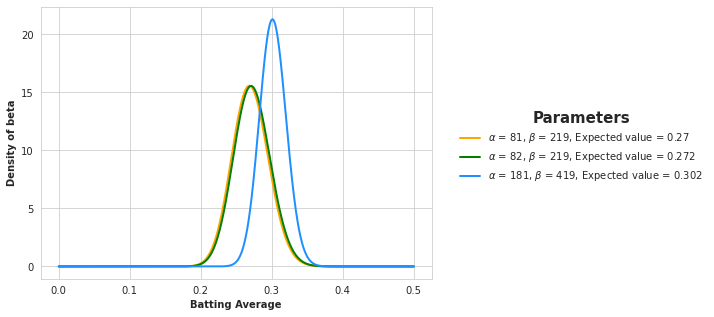

In [66]:
# Figure 2.3
with sns.axes_style("whitegrid"):
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot()

    # Define alpha and beta params
    alphas = [81,82,181] # num hits, num hits + 1 hit , num hits + 100 hits
    betas  = [219,219,419]

    # Plot
    clrs = ["orange","green","dodgerblue"]
    x = np.linspace(0,0.5,1000)
    for (a,b,clr) in zip(alphas,betas,clrs):
        y = ax.plot(x, stats.beta.pdf(x, a, b),color=clr, lw=2,label= r"$\alpha$ = {}, $\beta$ = {}, Expected value = {}".format(a,b,round(a/(a+b),3)))
    ax.legend(frameon=False,bbox_to_anchor=(1.05, .65),loc='upper left')
    ax.get_legend().set_title("Parameters",prop = {'size':15,'weight': "bold"})
    ax.set_xlabel("Batting Average",fontweight="bold")
    ax.set_ylabel("Density of beta",fontweight="bold")

# Section 2.3 - Conjugate Prior

In [129]:
# Define number of trials
num_trials = 10_000#_000

# Alpha and beta of our prior
a,b = 81,219

# Simulate - can this be done with two lines like in R?
true_average,hits = [],[]
for _ in range(num_trials):
    avg = np.random.beta(a,b,size=1)
    true_average.append(avg.item())
    hits.append(np.random.binomial(300, avg, 1).item())

simulations = pd.DataFrame({"True Average": true_average, "Hits": hits})
simulations.head(10)

,True Average,Hits
0,0.255599,65
1,0.248265,66
2,0.292829,82
3,0.266856,80
4,0.239584,69
5,0.259938,80
6,0.247707,72
7,0.285430,89
8,0.250087,71
9,0.270259,81


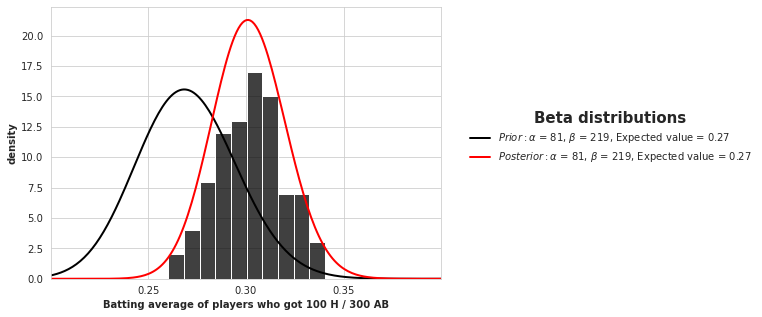

In [155]:
with sns.axes_style("whitegrid"):
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot()
    sns.histplot(data=simulations.loc[simulations.loc[:,"Hits"]==100,:],x="True Average",color="k",ax=ax)
    x = np.linspace(0,1,1000)
    ax.plot(x, stats.beta.pdf(x, a, b),color='black', lw=2,label= r"$Prior: \alpha$ = {}, $\beta$ = {}, Expected value = {}".format(a,b,round(a/(a+b),3)))
    ax.plot(x, stats.beta.pdf(x, a+100, b+200),color='r', lw=2,label= r"$Posterior: \alpha$ = {}, $\beta$ = {}, Expected value = {}".format(a,b,round(a/(a+b),3)))
    ax.set_xlim([0.2,0.4])
    ax.set_xticks([0.25,0.3,0.35])
    ax.set_xlabel("Batting average of players who got 100 H / 300 AB",fontweight="bold")
    ax.set_ylabel("density",fontweight="bold")
    ax.legend(frameon=False,bbox_to_anchor=(1.05, .65),loc='upper left')
    ax.get_legend().set_title("Beta distributions",prop = {'size':15,'weight': "bold"})

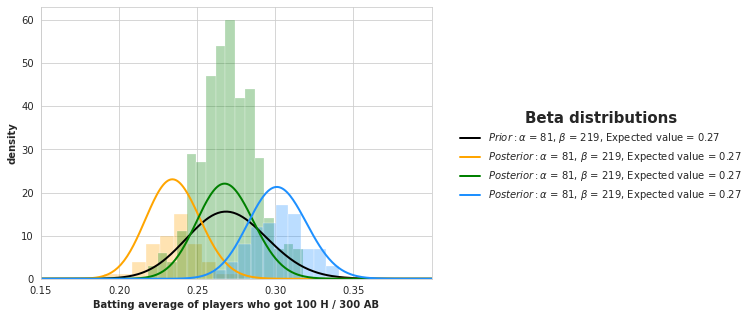

In [156]:
with sns.axes_style("whitegrid"):
    # Define figure
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot()
    # Create prior and plot data for each number of hits
    x = np.linspace(0,1,1000)
    ax.plot(x, stats.beta.pdf(x, a, b),color='black', lw=2,label= r"$Prior: \alpha$ = {}, $\beta$ = {}, Expected value = {}".format(a,b,round(a/(a+b),3)))
    for (hh,clr) in zip([60,80,100],["orange",'green','dodgerblue']):
        sns.histplot(data=simulations.loc[simulations.loc[:,"Hits"]==hh,:],x="True Average",color=clr,ax=ax,kde=False,alpha=0.3)
        ax.plot(x, stats.beta.pdf(x, a+hh, b+(300-hh)),color=clr, lw=2,label= r"$Posterior: \alpha$ = {}, $\beta$ = {}, Expected value = {}".format(a,b,round(a/(a+b),3)))
    # Figure clean up
    ax.set_xlim([0.15,0.4])
    ax.set_xticks([.15,.20,0.25,0.3,0.35])
    ax.set_xlabel("Batting average of players who got 100 H / 300 AB",fontweight="bold")
    ax.set_ylabel("density",fontweight="bold")
    ax.legend(frameon=False,bbox_to_anchor=(1.05, .65),loc='upper left')
    ax.get_legend().set_title("Beta distributions",prop = {'size':15,'weight': "bold"})